# Breast Cancer Dataset

## Data Exploration

In [1]:
'''Importing Required libraries'''
import numpy as np
import pandas as pd
from statistics import mean
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset into vairable using pandas read_csv method
dataset = pd.read_csv("CSVs/dataset.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Check whether any column contains any missing values or not. It can be checked by isnull()
# sum() provides data by axis = 0 default
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# As see above, it is clear that unnamed:32 column contains null values, So it is required to remove them
df=dataset.dropna(axis=1)# axis = 1 indicates column

In [5]:
#label encoder is method which is used to convert categorical data into numerical data
#As our dataset contains only 
target = LabelEncoder().fit_transform(df.iloc[:,1].values)# Second column (column =1) is the ouput class
features = df.iloc[:,2:31].values # Third Column to last column are the feature vectors

In [6]:
## Model Training and Evaluation

In [7]:
# degree is used when the kernel is ploynomial, if kernel is not polynomial then value of degree is ignored 
classifier = GaussianNB()

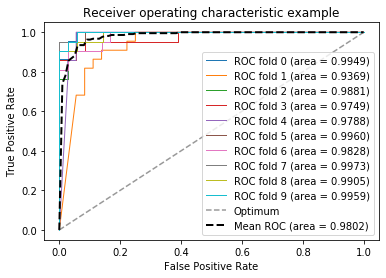

In [8]:
%matplotlib inline
# declaring variables for storing accuracy, precision, recall , f1 in each fold
accuracy = []
precision = []
recall = []
f1 = []
Auc =[]
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i=0 

scaler = StandardScaler()# to scale the features to have 0 mean and 1 variance.

strat_k_fold = StratifiedKFold(n_splits=10,random_state=42)# It will create 9 training sets and 1 testing set

# split function is used to split the k-1 training and 1 testing fold.
for train, test in strat_k_fold.split(features, target):
    #scale the training and example set by StandardScaler
    features[train] = scaler.fit_transform(features[train])
    features[test] = scaler.fit_transform(features[test])
    # fitting the classifier model
    classifier.fit(features[train], target[train])
    
    prob = classifier.predict_proba(features[test])# it returns the predicted probabilities
    pred = classifier.predict(features[test])# predict classes
    
    #append the scores into respective lists as declared above
    accuracy.append(accuracy_score(target[test], pred))
    precision.append(precision_score(target[test], pred))
    recall.append(recall_score(target[test], pred))
    f1.append(f1_score(target[test], pred))
    
    ''' Compute ROC curve and area the curve. It is plotted between
        >> ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model 
        at all classification thresholds
        >> AUC (Area under the curve) tells how effectively our model is distinguishing between the curves.
    '''
    # roc_curve is a method which returns false positive rate, true positive rate and thresholds on the basis of target and 
    # predicted probabilities
    
    fpr, tpr, thresholds = roc_curve(target[test], prob[:,1])
    # interp is the process of adding parameter between the points and it returns 1d array
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
    roc_auc = auc(fpr, tpr)#area under the curve
    Auc.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
    i=i+1

plt.plot([0, 1], [0, 1], '--', color=(0.6,0.6,0.6), label='Optimum')
# calculating mean
mean_tpr /=  strat_k_fold.get_n_splits(features, target)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.4f)' % mean_auc, lw=2)# ploting mean curve
# setting limits of x axix and y axis
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

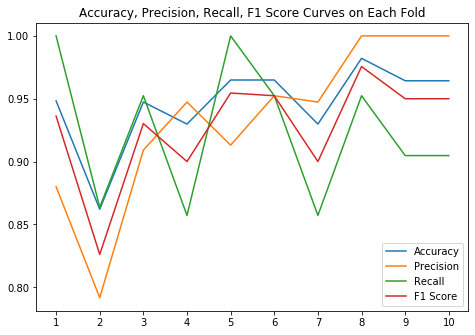

In [9]:
%matplotlib inline
x = np.arange(1,11)
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,accuracy, label ='Accuracy')
ax.plot(x,precision, label = 'Precision')
ax.plot(x,recall,label = 'Recall')
ax.plot(x,f1, label = 'F1 Score')
ax.legend(loc = 'best')
plt.xticks(x)
plt.title('Accuracy, Precision, Recall, F1 Score Curves on Each Fold')
plt.show()

In [10]:
accuracy = [round(i*100,2) for i in accuracy]
precision = [round(j*100,2) for j in precision]
f1 = [round(k*100,2) for k in f1]
recall = [round(l*100,2) for l in recall]
results = np.array([accuracy, precision, recall, f1, Auc])
results = results.transpose()
print(accuracy)

[94.83, 86.21, 94.74, 92.98, 96.49, 96.49, 92.98, 98.21, 96.43, 96.43]


In [11]:
columns = ['Accuracy (%)', 'Precision (%)','F1 Score (%)', 'Recall (%)', 'Area Under the Curve']
index = ['Fold 0','Fold 1','Fold 2','Fold 3', 'Fold 4', 'Fold 5','Fold 6','Fold 7','Fold 8', 'Fold 9']
resultant_dataframe = pd.DataFrame(results, columns = columns ,index = index)
resultant_dataframe.loc['Mean'] = resultant_dataframe.mean(numeric_only=True, axis=0)

In [12]:
resultant_dataframe

,Accuracy (%),Precision (%),F1 Score (%),Recall (%),Area Under the Curve
Fold 0,94.830,88.00,100.000,93.62,0.994949
Fold 1,86.210,79.17,86.360,82.61,0.936869
Fold 2,94.740,90.91,95.240,93.02,0.988095
Fold 3,92.980,94.74,85.710,90.00,0.974868
Fold 4,96.490,91.30,100.000,95.45,0.978836
Fold 5,96.490,95.24,95.240,95.24,0.996032
Fold 6,92.980,94.74,85.710,90.00,0.982804
Fold 7,98.210,100.00,95.240,97.56,0.997279
Fold 8,96.430,100.00,90.480,95.00,0.990476
Fold 9,96.430,100.00,90.480,95.00,0.995918


### Exporting Results to CSV

In [13]:
data = pd.DataFrame( columns = columns)
data.loc['Gaussian Naive Bayes'] = pd.Series( resultant_dataframe.loc['Mean'], index = columns)

In [14]:
data

,Accuracy (%),Precision (%),F1 Score (%),Recall (%),Area Under the Curve
Gaussian Naive Bayes,94.579,93.41,92.446,92.75,0.983613


In [15]:
data.to_csv('CSVs/stats.csv',mode = 'a',header=False)